<a href="https://colab.research.google.com/github/andreareosa/Data-Visualization/blob/main/Stats_EDA_CheatSheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import stats
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
np.random.seed(2)

# sample data
binomial = np.random.binomial(60, 0.3, size=1000)
normal_dist = np.random.normal(3, 3, size=100)
exp_dist = np.random.exponential(3, size=100)

# linear regression
lr_x = [23, 33, 25, 29, 39, 31, 21, 24, 34, 31]
lr_y = [1.5, 2.1, 1.6, 2, 3.1, 2.2, 1.8, 1.7, 1.9, 2.1]

# PDF

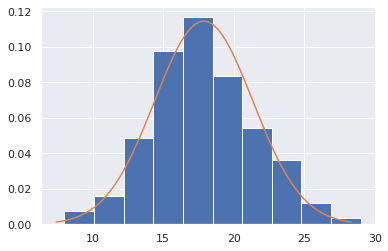

In [ ]:
# calculate mean and std from our data
sample_mean = np.mean(binomial)
sample_std = np.std(binomial)

# sample probabilities for a range of outcomes
x_pdf = np.linspace(sample_mean - 3 * sample_std, sample_mean + 3 * sample_std, 100)
y_pdf = stats.norm.pdf(x_pdf, sample_mean, sample_std)

# plot the histogram and pdf
plt.hist(binomial, bins=10, density=True)
plt.plot(x_pdf, y_pdf)
plt.show()

# CDF

In [ ]:
# cdf function
def cdf(data):
  x = np.sort(data, axis=0)
  y = np.arange(1, len(x) + 1) / len(data)
  return x, y

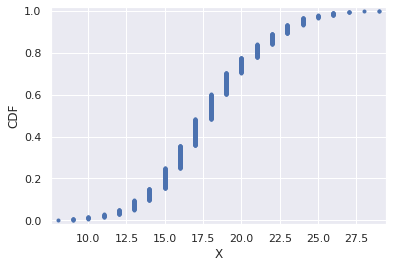

In [ ]:
x, y = cdf(binomial) # discrete values example

plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('X')
plt.ylabel('CDF')
plt.show()

# CDF - To check Normal Distribution

In [ ]:
# calculate mean and std from our data
cn_mean = np.mean(normal_dist)
cn_std = np.std(normal_dist)

# sample data
sample_norm = np.random.normal(cn_mean, cn_std, size=10000)
cn_x_theor, cn_y_theor = cdf(sample_norm)

# "real" data to compare (normal_dist)
cn_x, cn_y = cdf(normal_dist)

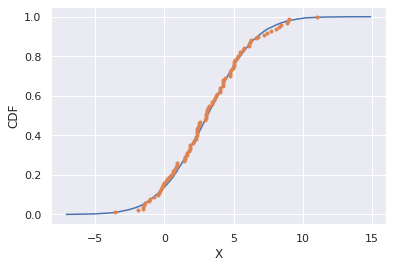

In [ ]:
_ = plt.plot(cn_x_theor, cn_y_theor)
_ = plt.plot(cn_x, cn_y, marker='.', linestyle='none')
_ = plt.xlabel('X')
_ = plt.ylabel('CDF')
plt.show()

# Exponential Distribution

In [ ]:
# calculate mean from our data
exp_mean = np.mean(exp_dist)

# sample data
exp_sample = np.random.exponential(exp_mean, size=10000)
exp_x_theor, exp_y_theor = cdf(exp_sample)

# real data  to compare (exp_dist)
exp_x, exp_y = cdf(exp_dist)

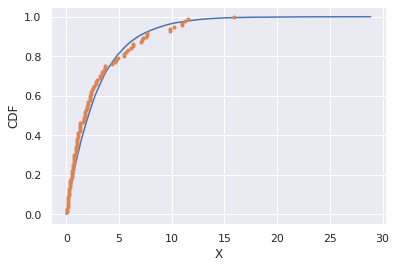

In [ ]:
_ = plt.plot(exp_x_theor, exp_y_theor)
_ = plt.plot(exp_x, exp_y, marker='.', linestyle='none')
_ = plt.xlabel('X')
_ = plt.ylabel('CDF')
plt.show()

# Gaussian Distribution

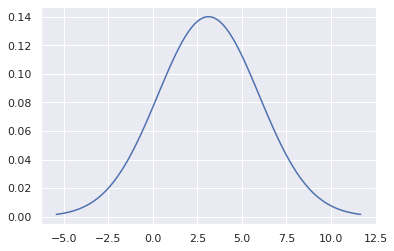

In [ ]:
mu, sigma = stats.norm.fit(normal_dist)

xs = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
ys = stats.norm.pdf(xs, mu, sigma)

_ = plt.plot(xs, ys)
plt.show()

# Linear Regression

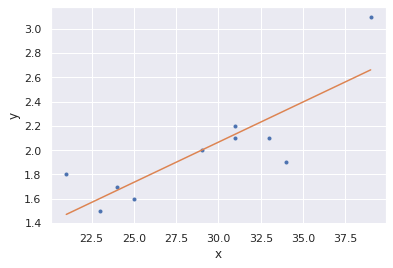

In [ ]:
_ = plt.plot(lr_x, lr_y, marker='.', linestyle='none')
_ = plt.xlabel('x')
_ = plt.ylabel('y')

a, b = np.polyfit(lr_x, lr_y, 1)

# theoretical line to plot
x = np.array([min(lr_x), max(lr_x)])
y = a * x + b

# regression line
_ = plt.plot(x, y)

plt.show()

# Bootstrap - CDF

plot the cdf of the data and his different bootstrap replicates

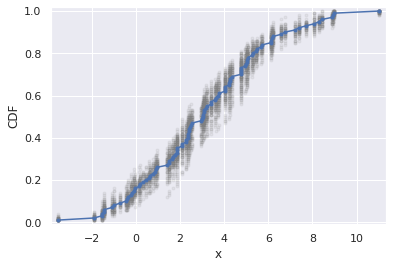

In [ ]:
for _ in range(50):
    # bootstrap sample
    bs_sample = np.random.choice(normal_dist, size=len(normal_dist))

    # cdf from bootstrap sample
    x, y = cdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# cdf from original data
x, y = cdf(normal_dist)
_ = plt.plot(x, y, marker='.')


plt.margins(0.02)
_ = plt.xlabel('x')
_ = plt.ylabel('CDF')

plt.show()

# Bootstrap 

In [ ]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [ ]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # array of replicates
    bs_replicates = np.empty(size)

    # generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

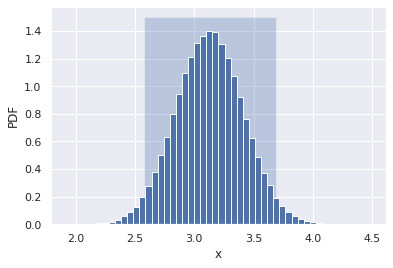

Confidence Intervals:  [2.5702016  3.69105161]


In [ ]:
bs_replicates = draw_bs_reps(normal_dist, np.mean, size=100000)

_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('x')
_ = plt.ylabel('PDF')

conf_int95 = np.percentile(bs_replicates, [2.5, 97.5])
_ = plt.fill_betweenx([0, 1.5], conf_int95[0], conf_int95[1], alpha=0.3)

plt.show()
print('Confidence Intervals: ', conf_int)

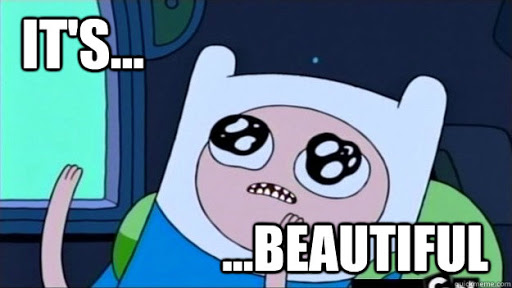